In [ ]:
# import the Libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340
...,...,...
4453,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-100.000000
4454,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
4455,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.024300
4456,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.022220


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
train_df = train_df.dropna()

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:

X = dataset.iloc [: ,:-1].values    # independent variables
y = dataset.iloc [: , -1].values    # dependent variables

In [ ]:
X

array([['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0000212.png'],
       ['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0000243.png'],
       ['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0000255.png'],
       ...,
       ['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0072927.png'],
       ['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0072930.png'],
       ['/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0073177.png']],
      dtype=object)

In [ ]:
y

array([0.03745 , 0.02961 , 0.002882, ..., 0.0243  , 0.02222 , 0.005804])

In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=ab4a4245d72c60d667ce0b0a08615e41fe97b94f20e202d5dcf94f6ee8d7b8d2
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/galaxy_images/PGC0000212.png')

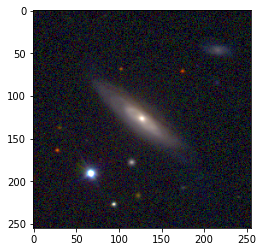

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(255, 255, 3)

In [ ]:

pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

In [ ]:
pixels.shape

(65025, 3)

In [ ]:
som = MiniSom(x= 4, y = 4, input_len = 3, sigma=0.1, learning_rate=0.2, topology='hexagonal')

In [ ]:
som.random_weights_init(pixels)

In [ ]:
starting_weights = som.get_weights().copy()

In [ ]:
som.train_random(pixels, 100)

In [ ]:
qnt = som.quantization(pixels)

In [ ]:

clustered = np.zeros(img.shape)

In [ ]:
for i, k in enumerate(qnt):
  clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = k

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


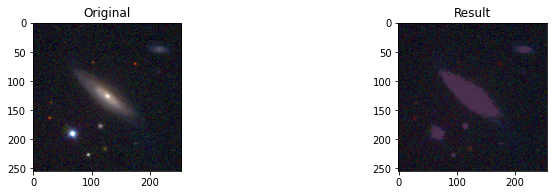

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Result')
plt.imshow(clustered)

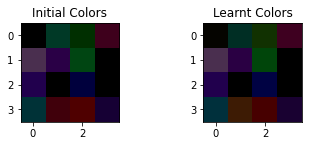

In [ ]:
plt.subplot(223)
plt.title('Initial Colors')
plt.imshow(starting_weights)
plt.subplot(224)
plt.title('Learnt Colors')
plt.imshow(som.get_weights())

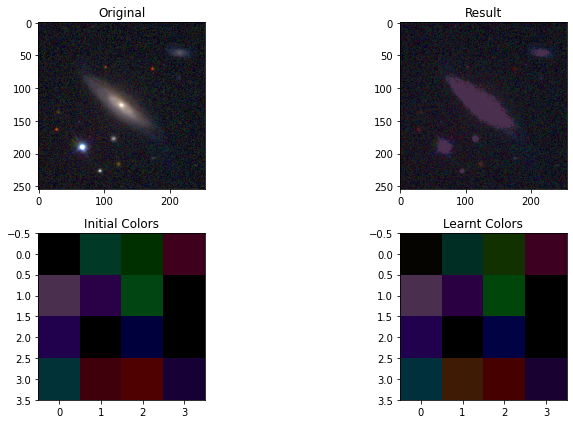

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Result')
plt.imshow(clustered)


plt.subplot(223)
plt.title('Initial Colors')
plt.imshow(starting_weights)
plt.subplot(224)
plt.title('Learnt Colors')
plt.imshow(som.get_weights())

plt.tight_layout()
plt.show()